    Bernacchia Alessia, Pioda Tommaso, Villani Giacomo
# Is Boston a safe place?
## data visualization project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('future.no_silent_downcasting', True)

In [3]:
crime = pd.read_csv('crime.csv', encoding='latin1')
#seizure = pd.read_csv('seizures_1.csv')
#traffic = pd.read_csv('traffic_violations.csv')

### exploration

In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [6]:
crime.shape

(319073, 17)

In [7]:
crime.describe().loc[['min', 'max']]

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
min,111.0,2015.0,1.0,0.0,-1.000000,-71.178674
max,3831.0,2018.0,12.0,23.0,42.395042,-1.000000


In [8]:
crime.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [9]:
for f in crime.columns:
    print(f'{f} has this values: {crime[f].unique()}')

INCIDENT_NUMBER has this values: ['I182070945' 'I182070943' 'I182070941' ... 'I030217815-08'
 'I010370257-00' '142052550']
OFFENSE_CODE has this values: [ 619 1402 3410 3114 3820  724 3301  301 3108 2647 3201 3006 3305  614
 3801 3803  522 3831  802 2007 2900 2907 2629 2662 3207  613 3109 2612
 1843 3125 1841 3802 3018 2405  617 3625 3106 3501 3115  616 3807 1102
 1849 2905 1810 1842 1806 1848 1844  423 3205  413 1501 3001 3830  561
 2914 2610 1109  706 2403 3160  900  801 3002  520 2648  670  615 3116
 1504 1830  361 2006  311 1001 3810 2401 2646 3821 3811 3007 2660 1831
 3119 3170 1874 3112 3502  735  612  560  381 3402 1815 1107 2101 1106
 3202 1503 1846 3016 3304  611 2622 3130 2407 2657 3111 3503 2906  540
 3208 1832  521 1847 1510 1850 2010 2616 1304 2511 2005 1605 3805 1300
 2102 3008 2632 3102 1415  542 2663 1805 3620 2604  371 2204 2619  727
  804 2003 1845  111 2613 1201 2617 3123 3110  541 2670 2623 2608 3004
 2618  562 1108 1825 2628 1870  351 1602 3122 3303 1807 2636 2611 

### Pratically Changes

Rename the columns

In [10]:
# rename columns
crime.columns = [col.title().replace(" ", "_") for col in crime.columns]
crime.columns

Index(['Incident_Number', 'Offense_Code', 'Offense_Code_Group',
       'Offense_Description', 'District', 'Reporting_Area', 'Shooting',
       'Occurred_On_Date', 'Year', 'Month', 'Day_Of_Week', 'Hour', 'Ucr_Part',
       'Street', 'Lat', 'Long', 'Location'],
      dtype='object')

Put the description of the offenses in lower case

In [11]:
crime['Offense_Code_Group'] = crime['Offense_Code_Group'].str.lower()
crime["Offense_Description"] = crime["Offense_Description"].str.lower()

Maybe is better remove the offense_code column from our analysis.
The offense code are more than the offense code group, but we don't know the real meaning of this code. We have two options:
- choose the meaning of the codes and traslate them to the real offense done
- drop this column and focus our analysis on the offense code group

In [12]:
n_off_cod = len(crime['Offense_Code'].unique())
n_off_cod_gr = len(crime['Offense_Code_Group'].unique())
print(f'In the dataset there are {n_off_cod} offense codes and {n_off_cod_gr} offense code groups.')

In the dataset there are 222 offense codes and 66 offense code groups.


In [13]:
crime = crime.drop('Offense_Code', axis=1)

### Duplicates

In [14]:
bool_series = crime.duplicated(keep='first') 
print(f'The data has {bool_series.sum().sum()} duplicated')

data_without_duplicates = crime[~bool_series]

len(crime), len(data_without_duplicates)

The data has 24 duplicated


(319073, 319049)

In this case I suppose that we shouldn't delete the duplicated data, because it's possible that the same type of incident has been done from different people togheter.

In [15]:
#crime = data_without_duplicates

### Missing Values

- for SHOOTING

In [16]:
crime['Shooting'].unique()

array([nan, 'Y'], dtype=object)

In [17]:
crime['Shooting'].isna().sum()


np.int64(318054)

the missing values are the incident without a shooting

In [18]:
crime['Shooting'] = crime['Shooting'].replace(['Y', np.nan], [True, False]).astype(bool)

In [19]:
crime['Shooting'].unique()

array([False,  True])

In [20]:
crime['Shooting'][crime['Shooting'] == True].sum()

np.int64(1019)

- for DISTRICT

In [21]:
crime['District'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [22]:
crime['District'].isna().sum()

np.int64(1765)

In [23]:
n_nan = crime['District'].isna().sum()
tot = len(crime)
print(f'The nan value are {round((n_nan*100)/tot, 2)} %.')

The nan value are 0.55 %.


We can delete them.

In [24]:
bool_series = crime['District'].isna() 
print(f'The data has {bool_series.sum().sum()} nan')

data_without_nan = crime[~bool_series]

print(f'dropped {len(crime)-len(data_without_nan)} instances')

The data has 1765 nan
dropped 1765 instances


In [25]:
crime = data_without_nan

### Outliers

In [26]:
# find the index of the outliers for a feature
def iqr_outliers(data, f):
    # find the quantile
    Q1 = data[f].quantile(0.25)
    Q3 = data[f].quantile(0.75)
    # calculate the inter quantile range
    IQR = Q3 - Q1
    # select the boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # find indexes of outliers
    outliers_indexes_iqr = data[(data[f] < lower_bound) | (data[f] > upper_bound)].index
    return outliers_indexes_iqr

<Axes: >

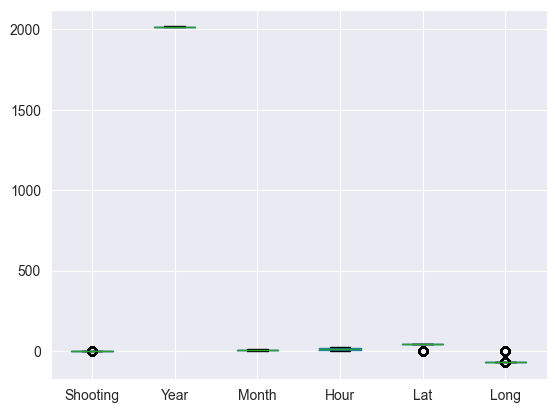

In [27]:
crime.boxplot()

In [28]:
# Initialize dict and list to store outliers information
outliers_df = pd.DataFrame(columns=['feature', 'outlier indexes'])
features =[] #todo features from which we have to remove the outliers 
for f in features:
    outliers_indexes = iqr_outliers(crime, f)
    new_instance = pd.DataFrame({'feature': f, 'outlier indexes': outliers_indexes})
    outliers_df = pd.concat([outliers_df, new_instance], ignore_index=True)
    print(f'The feature {f} has {len(outliers_indexes)} outliers.')
    
outliers_df.groupby('feature').count()
outliers_indexes_unique = outliers_df['outlier indexes'].unique()
print(f'The dataset has {len(outliers_indexes_unique)} instances with outliers.')
print(f'that is the {round((len(outliers_indexes_unique)*100)/len(crime),2)}% of the instances')


The dataset has 0 instances with outliers.
that is the 0.0% of the instances


In [29]:
data_with_nan_outliers = crime.copy(deep=True)
data_dropped_outliers = crime.copy(deep=True)

for idx in range(len(outliers_df)):
    index = int(outliers_df.loc[idx]['outlier indexes'])
    feat = outliers_df.loc[idx]['feature']
    # replace the outlier value with nan
    data_with_nan_outliers.at[index, feat] = np.nan
for index in outliers_df['outlier indexes'].unique():
    # drop the instance with the missing value
    data_dropped_outliers = data_dropped_outliers.drop(index)

print('dropping them')
print(f'The instances of the data before dropping the outliers are {crime.shape[0]}.')
print(f'Now the instances are {data_dropped_outliers.shape[0]}')
print('\nputting nan them')
print(f'The missing values before the replacement are {crime.isna().sum().sum()}.')
print(f'Now the missing values are {data_with_nan_outliers.isna().sum().sum()}.')

dropping them
The instances of the data before dropping the outliers are 317308.
Now the instances are 317308

putting nan them
The missing values before the replacement are 49344.
Now the missing values are 49344.


### export of the new dataset

In [30]:
crime.to_csv('crime_cleaned.csv', index=False)
#todo pip install openpyxl
crime.to_excel('crime_cleaned.xlsx', index=False)

### export one dataset for each offense code groups

In [31]:
crime['Offense_Code_Group'].value_counts()

Offense_Code_Group
motor vehicle accident response              36654
larceny                                      25861
medical assistance                           23475
investigate person                           18681
other                                        17992
                                             ...  
gambling                                         8
human trafficking                                7
biological threat                                2
human trafficking - involuntary servitude        2
burglary - no property taken                     2
Name: count, Length: 66, dtype: int64

In [32]:
# create the folder if it doesn't exist
folder_path = '.\\df_offense_code_group'
os.makedirs(folder_path, exist_ok=True)

for g in crime['Offense_Code_Group'].unique():
    # replace the character not valid
    safe_group_name = g.replace('/', '_') if isinstance(g, str) else 'Unknown'
    # make a file path with the adequate file name
    file_path = os.path.join(folder_path, f'{safe_group_name}.csv')

    # filter data
    df = crime[crime['Offense_Code_Group'] == g]

    # save the file
    df.to_csv(file_path, index=False)
    #df.to_excel(file_path, index=False)


### export one dataset for each district

In [33]:
crime['District'].value_counts()

District
B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: count, dtype: int64

In [34]:
# create the folder if it doesn't exist
folder_path = '.\\df_district'
os.makedirs(folder_path, exist_ok=True)

for g in crime['District'].unique():
    # replace the character not valid
    safe_group_name = g.replace('/', '_') if isinstance(g, str) else 'Unknown'
    # make a file path with the adequate file name
    file_path = os.path.join(folder_path, f'{safe_group_name}.csv')

    # filter data
    df = crime[crime['District'] == g]

    # save the file
    df.to_csv(file_path, index=False)
    #df.to_excel(file_path, index=False)
